In [1]:
%load_ext autoreload
%autoreload 2

In [ ]:
import os
import subprocess


def get_git_root():
    """Get the root directory of the git repository"""
    try:
        git_root = (
            subprocess.check_output(
                ["git", "rev-parse", "--show-toplevel"], stderr=subprocess.DEVNULL
            )
            .strip()
            .decode("utf-8")
        )
        return git_root
    except (subprocess.CalledProcessError, FileNotFoundError):
        return None


# Change to git root
git_root = get_git_root()
if git_root:
    os.chdir(git_root)
    print(f"Changed to git root: {os.getcwd()}")
else:
    print("Not in a git repository or git not found")

Changed to git root: /Users/sherman/GitHub/CSE-6748


In [3]:
import pickle

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from scipy import stats
from scipy.stats import anderson, kstest, normaltest, shapiro
from sklearn.metrics import mean_squared_error

pd.set_option("display.max_columns", None)

In [ ]:
student_profile = pd.read_pickle("data/cleaned/student_profile_dataset.pkl")
student_profile.head()

,mask_studentpersonkey,GradeLevel,CurrentEnrollment,FinalPrimaryEnrollmentForYearFlag,RetainedFlag,EnrollmentReasonDesc,WithDrawalReasonDesc,FirstDayOfSchoolYear,SchoolYearNumberFall,SchoolYearNumberSpring,SchoolStatusDesc,SchoolDetailReportName,SchoolDetailLevelDesc,SchoolStatusDescNextYear,SchoolDetailReportNameNextYear,SchoolDetailLevelDescNextYear,ActiveGiftedStudentResultRecordFlag,grad,milestone,illuminate,sat,rit
2,107055,6,N,Y,N,Transferred from another GA district,Year End,2023-07-19,2023,2024,Open,Woodland Middle,Middle School,Open,Woodland Middle,Middle School,NaN,NaN,NestedData(SubjectDesc=['English Language Arts...,NestedData(responsedatevalue=[datetime.date(20...,NaN,NaN
3,114271,12,N,Y,Y,Continuing in same school,High School Graduation,2021-07-24,2021,2022,Open,Johns Creek High,High School,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,117427,12,N,Y,N,Continuing in same school,High School Graduation,2021-07-24,2021,2022,Open,Northview High,High School,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,117773,12,N,Y,N,Continuing in same school,Court Order or Legal Requirement,2021-07-24,2021,2022,Open,Centennial High,High School,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,117995,12,N,Y,N,Continuing in same school,High School Graduation,2021-07-24,2021,2022,Open,Roswell High,High School,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
X_index = pd.read_parquet("data/cleaned/X_index.parquet")
X_train = pd.read_parquet("data/cleaned/X_train.parquet")
X_valid = pd.read_parquet("data/cleaned/X_valid.parquet")
Y_train = pd.read_parquet("data/cleaned/Y_train.parquet")
Y_valid = pd.read_parquet("data/cleaned/Y_valid.parquet")

X_train = pd.merge(X_index, X_train, left_index=True, right_index=True, how="inner")
X_valid = pd.merge(X_index, X_valid, left_index=True, right_index=True, how="inner")

In [ ]:
display(X_index.head())
display(X_index.shape)
display(X_train.head())
display(X_train.shape)
display(X_valid.head())
display(X_valid.shape)
display(Y_train.head())
display(Y_train.shape)
display(Y_valid.head())
display(Y_valid.shape)

,mask_studentpersonkey
0,1389182
1,1390795
2,1392398
3,1395568
4,1395578


(13880, 1)

,mask_studentpersonkey,RetainedFlag_latest,GradeLevel_latest,is_gifted_latest,grade_mode_numeric_latest,improvement_first_to_last_latest,is_on_sat_grade_level_latest,last_percent_correct_latest,low_mastery_rate_below_50_latest,mastery_rate_above_80_latest,math_improvement_first_to_last_latest,math_low_mastery_rate_below_50_latest,math_mastery_rate_above_80_latest,math_mean_item_pct_correct_latest,math_percent_extension_latest,math_percent_reteach_latest,math_percent_review_practice_latest,math_slope_percent_correct_over_time_latest,math_std_item_pct_correct_latest,math_total_points_earned_latest,math_total_points_possible_latest,math_weighted_percent_correct_latest,mean_item_percent_correct_latest,mean_standard_percent_correct_latest,mean_std_pct_ela_latest,mean_std_pct_math_latest,num_assessments_latest,num_items_latest,percent_extension_latest,percent_reteach_latest,percent_review_practice_latest,slope_percent_correct_over_time_latest,std_item_percent_correct_latest,total_points_earned_latest,total_points_possible_latest,verbal_improvement_first_to_last_latest,verbal_low_mastery_rate_below_50_latest,verbal_mastery_rate_above_80_latest,verbal_mean_item_pct_correct_latest,verbal_percent_extension_latest,verbal_percent_reteach_latest,verbal_percent_review_practice_latest,verbal_slope_percent_correct_over_time_latest,verbal_std_item_pct_correct_latest,verbal_total_points_earned_latest,verbal_total_points_possible_latest,verbal_weighted_percent_correct_latest,weighted_overall_percent_correct_latest,achievement_level_mean_ela_latest,achievement_level_mean_math_latest,lexile_mean_ela_latest,lexile_mean_math_latest,mean_achievement_level_all_latest,mean_lexile_score_all_latest,mean_scale_score_all_latest,num_subjects_tested_latest,num_test_days_latest,num_unique_test_dates_latest,pct_proficient_all_latest,pct_proficient_ela_latest,pct_proficient_math_latest,scale_score_improvement_all_latest,scale_score_improvement_ela_latest,scale_score_improvement_math_latest,scale_score_mean_ela_latest,scale_score_mean_math_latest,scale_score_slope_all_latest,scale_score_slope_ela_latest,scale_score_slope_math_latest,scale_score_std_ela_latest,scale_score_std_math_latest,std_scale_score_all_latest,count_quintile_avg_latest,count_quintile_hiavg_latest,count_quintile_high_latest,count_quintile_low_latest,count_quintile_lowavg_latest,max_rit_score_latest,mean_percent_correct_latest,mean_percentile_latest,mean_rit_score_latest,mean_test_duration_latest,min_rit_score_latest,num_tests_latest,pct_quintile_high_latest,std_percent_correct_latest,std_percentile_latest,std_rit_score_latest,std_test_duration_latest,grade_mode_numeric_delta,improvement_first_to_last_delta,is_on_sat_grade_level_delta,last_percent_correct_delta,low_mastery_rate_below_50_delta,mastery_rate_above_80_delta,math_improvement_first_to_last_delta,math_low_mastery_rate_below_50_delta,math_mastery_rate_above_80_delta,math_mean_item_pct_correct_delta,math_percent_extension_delta,math_percent_reteach_delta,math_percent_review_practice_delta,math_slope_percent_correct_over_time_delta,math_std_item_pct_correct_delta,math_total_points_earned_delta,math_total_points_possible_delta,math_weighted_percent_correct_delta,mean_item_percent_correct_delta,mean_standard_percent_correct_delta,mean_std_pct_ela_delta,mean_std_pct_math_delta,num_assessments_delta,num_items_delta,percent_extension_delta,percent_reteach_delta,percent_review_practice_delta,slope_percent_correct_over_time_delta,std_item_percent_correct_delta,total_points_earned_delta,total_points_possible_delta,verbal_improvement_first_to_last_delta,verbal_low_mastery_rate_below_50_delta,verbal_mastery_rate_above_80_delta,verbal_mean_item_pct_correct_delta,verbal_percent_extension_delta,verbal_percent_reteach_delta,verbal_percent_review_practice_delta,verbal_slope_percent_correct_over_time_delta,verbal_std_item_pct_correct_delta,verbal_total_points_earned_delta,verbal_total_points_possible_delta,verbal_weighted_percent_correct_delta,weighted_

(11104, 260)

,mask_studentpersonkey,RetainedFlag_latest,GradeLevel_latest,is_gifted_latest,grade_mode_numeric_latest,improvement_first_to_last_latest,is_on_sat_grade_level_latest,last_percent_correct_latest,low_mastery_rate_below_50_latest,mastery_rate_above_80_latest,math_improvement_first_to_last_latest,math_low_mastery_rate_below_50_latest,math_mastery_rate_above_80_latest,math_mean_item_pct_correct_latest,math_percent_extension_latest,math_percent_reteach_latest,math_percent_review_practice_latest,math_slope_percent_correct_over_time_latest,math_std_item_pct_correct_latest,math_total_points_earned_latest,math_total_points_possible_latest,math_weighted_percent_correct_latest,mean_item_percent_correct_latest,mean_standard_percent_correct_latest,mean_std_pct_ela_latest,mean_std_pct_math_latest,num_assessments_latest,num_items_latest,percent_extension_latest,percent_reteach_latest,percent_review_practice_latest,slope_percent_correct_over_time_latest,std_item_percent_correct_latest,total_points_earned_latest,total_points_possible_latest,verbal_improvement_first_to_last_latest,verbal_low_mastery_rate_below_50_latest,verbal_mastery_rate_above_80_latest,verbal_mean_item_pct_correct_latest,verbal_percent_extension_latest,verbal_percent_reteach_latest,verbal_percent_review_practice_latest,verbal_slope_percent_correct_over_time_latest,verbal_std_item_pct_correct_latest,verbal_total_points_earned_latest,verbal_total_points_possible_latest,verbal_weighted_percent_correct_latest,weighted_overall_percent_correct_latest,achievement_level_mean_ela_latest,achievement_level_mean_math_latest,lexile_mean_ela_latest,lexile_mean_math_latest,mean_achievement_level_all_latest,mean_lexile_score_all_latest,mean_scale_score_all_latest,num_subjects_tested_latest,num_test_days_latest,num_unique_test_dates_latest,pct_proficient_all_latest,pct_proficient_ela_latest,pct_proficient_math_latest,scale_score_improvement_all_latest,scale_score_improvement_ela_latest,scale_score_improvement_math_latest,scale_score_mean_ela_latest,scale_score_mean_math_latest,scale_score_slope_all_latest,scale_score_slope_ela_latest,scale_score_slope_math_latest,scale_score_std_ela_latest,scale_score_std_math_latest,std_scale_score_all_latest,count_quintile_avg_latest,count_quintile_hiavg_latest,count_quintile_high_latest,count_quintile_low_latest,count_quintile_lowavg_latest,max_rit_score_latest,mean_percent_correct_latest,mean_percentile_latest,mean_rit_score_latest,mean_test_duration_latest,min_rit_score_latest,num_tests_latest,pct_quintile_high_latest,std_percent_correct_latest,std_percentile_latest,std_rit_score_latest,std_test_duration_latest,grade_mode_numeric_delta,improvement_first_to_last_delta,is_on_sat_grade_level_delta,last_percent_correct_delta,low_mastery_rate_below_50_delta,mastery_rate_above_80_delta,math_improvement_first_to_last_delta,math_low_mastery_rate_below_50_delta,math_mastery_rate_above_80_delta,math_mean_item_pct_correct_delta,math_percent_extension_delta,math_percent_reteach_delta,math_percent_review_practice_delta,math_slope_percent_correct_over_time_delta,math_std_item_pct_correct_delta,math_total_points_earned_delta,math_total_points_possible_delta,math_weighted_percent_correct_delta,mean_item_percent_correct_delta,mean_standard_percent_correct_delta,mean_std_pct_ela_delta,mean_std_pct_math_delta,num_assessments_delta,num_items_delta,percent_extension_delta,percent_reteach_delta,percent_review_practice_delta,slope_percent_correct_over_time_delta,std_item_percent_correct_delta,total_points_earned_delta,total_points_possible_delta,verbal_improvement_first_to_last_delta,verbal_low_mastery_rate_below_50_delta,verbal_mastery_rate_above_80_delta,verbal_mean_item_pct_correct_delta,verbal_percent_extension_delta,verbal_percent_reteach_delta,verbal_percent_review_practice_delta,verbal_slope_percent_correct_over_time_delta,verbal_std_item_pct_correct_delta,verbal_total_points_earned_delta,verbal_total_points_possible_delta,verbal_weighted_percent_correct_delta,weighted_

(2776, 260)

,sat_math_score,sat_verbal_score
2047,350,530
1338,460,470
8074,460,430
12299,500,520
12517,500,540


(11104, 2)

,sat_math_score,sat_verbal_score
5864,550,620
2522,340,370
5940,380,380
6085,770,650
4603,430,540


(2776, 2)

In [ ]:
# Load the model
with open("models/catboost_model.pkl", "rb") as f:
    model = pickle.load(f)

print("Model loaded successfully")

Model loaded successfully


In [8]:
# Generate predictions for validation set
y_pred_valid = model.predict(X_valid.drop("mask_studentpersonkey", axis=1))
y_pred_valid_int = np.round(y_pred_valid, 0).astype(int)

# Create predictions DataFrame
predictions_df = pd.DataFrame(
    {
        "mask_studentpersonkey": X_valid["mask_studentpersonkey"],
        "actual_sat_math_score": Y_valid["sat_math_score"],
        "actual_sat_verbal_score": Y_valid["sat_verbal_score"],
        "pred_sat_math_score": y_pred_valid_int[:, 0],
        "pred_sat_verbal_score": y_pred_valid_int[:, 1],
    }
)

# fmt: off
# Calculate errors
predictions_df["error_math"] = (predictions_df["actual_sat_math_score"] - predictions_df["pred_sat_math_score"])
predictions_df["error_verbal"] = (predictions_df["actual_sat_verbal_score"] - predictions_df["pred_sat_verbal_score"])
predictions_df["abs_error_math"] = np.abs(predictions_df["error_math"])
predictions_df["abs_error_verbal"] = np.abs(predictions_df["error_verbal"])

print(f"Generated predictions for {len(predictions_df)} students")
print(f"Overall RMSE - Math: {np.sqrt(mean_squared_error(predictions_df['actual_sat_math_score'], predictions_df['pred_sat_math_score'])):.2f}")
print(f"Overall RMSE - Verbal: {np.sqrt(mean_squared_error(predictions_df['actual_sat_verbal_score'], predictions_df['pred_sat_verbal_score'])):.2f}")
# fmt: on

predictions_df.head()

Generated predictions for 2776 students
Overall RMSE - Math: 63.36
Overall RMSE - Verbal: 56.77


,mask_studentpersonkey,actual_sat_math_score,actual_sat_verbal_score,pred_sat_math_score,pred_sat_verbal_score,error_math,error_verbal,abs_error_math,abs_error_verbal
1,1390795,560,550,550,563,10,-13,10,13
3,1395568,560,560,552,611,8,-51,8,51
10,1410424,610,560,596,605,14,-45,14,45
12,1412177,460,390,396,408,64,-18,64,18
15,1419403,370,470,446,509,-76,-39,76,39


In [ ]:
# Create segments based on available data types
# First, identify students in validation set from student_profile

# Get the validation student IDs
valid_student_ids = set(X_valid["mask_studentpersonkey"].astype(str))

# fmt: off
# Filter student_profile to only validation students
valid_student_profile = student_profile[student_profile["mask_studentpersonkey"].astype(str).isin(valid_student_ids)].copy()
print(f"Found {len(valid_student_profile)} records for {len(valid_student_ids)} validation students")
# fmt: on

Found 8062 records for 2776 validation students


In [10]:
# Check data availability for each assessment type
def has_data(series):
    """Check if a student has non-null data for an assessment type"""
    return series.notna() & (series != "") & (series.astype(str) != "nan")


# Create flags for each assessment type
valid_student_profile["has_rit"] = has_data(valid_student_profile["rit"])
valid_student_profile["has_illuminate"] = has_data(valid_student_profile["illuminate"])
valid_student_profile["has_milestone"] = has_data(valid_student_profile["milestone"])

# Group by student and aggregate data availability
student_data_availability = (
    valid_student_profile.groupby("mask_studentpersonkey")
    .agg({"has_rit": "any", "has_illuminate": "any", "has_milestone": "any"})
    .reset_index()
)

# fmt: off
print("Data availability summary:")
print(f"Students with RIT data: {student_data_availability['has_rit'].sum()} ({student_data_availability['has_rit'].mean()*100:.1f}%)")
print(f"Students with Illuminate data: {student_data_availability['has_illuminate'].sum()} ({student_data_availability['has_illuminate'].mean()*100:.1f}%)")
print(f"Students with Milestone data: {student_data_availability['has_milestone'].sum()} ({student_data_availability['has_milestone'].mean()*100:.1f}%)")
# fmt: on

student_data_availability.head()

Data availability summary:
Students with RIT data: 2638 (95.0%)
Students with Illuminate data: 2090 (75.3%)
Students with Milestone data: 2655 (95.6%)


,mask_studentpersonkey,has_rit,has_illuminate,has_milestone
0,1390795,True,True,True
1,1395568,True,False,False
2,1410424,True,True,True
3,1412177,True,True,True
4,1419403,True,True,True


In [ ]:
# Merge predictions with student data availability
analysis_df = predictions_df.merge(
    student_data_availability,
    on="mask_studentpersonkey",
    how="left",
)

print(f"Merged data shape: {analysis_df.shape}")

analysis_df.head()

Merged data shape: (2776, 12)


,mask_studentpersonkey,actual_sat_math_score,actual_sat_verbal_score,pred_sat_math_score,pred_sat_verbal_score,error_math,error_verbal,abs_error_math,abs_error_verbal,has_rit,has_illuminate,has_milestone
0,1390795,560,550,550,563,10,-13,10,13,True,True,True
1,1395568,560,560,552,611,8,-51,8,51,True,False,False
2,1410424,610,560,596,605,14,-45,14,45,True,True,True
3,1412177,460,390,396,408,64,-18,64,18,True,True,True
4,1419403,370,470,446,509,-76,-39,76,39,True,True,True


In [ ]:
# Create uncertainty analysis with individual data availability columns
def create_individual_segment_analysis():
    """Create analysis with separate has_rit, has_illuminate, has_milestone columns"""

    # Get all unique combinations of data availability
    unique_combinations = analysis_df[
        ["has_rit", "has_illuminate", "has_milestone"]
    ].drop_duplicates()

    analysis_results = []

    for _, combination in unique_combinations.iterrows():
        has_rit = combination["has_rit"]
        has_illuminate = combination["has_illuminate"]
        has_milestone = combination["has_milestone"]

        # Filter data for this specific combination
        mask = (
            (analysis_df["has_rit"] == has_rit)
            & (analysis_df["has_illuminate"] == has_illuminate)
            & (analysis_df["has_milestone"] == has_milestone)
        )

        segment_data = analysis_df[mask]

        if len(segment_data) == 0:
            continue

        # Calculate error metrics
        math_errors = segment_data["error_math"]
        verbal_errors = segment_data["error_verbal"]
        math_abs_errors = segment_data["abs_error_math"]
        verbal_abs_errors = segment_data["abs_error_verbal"]

        result = {
            # Data availability flags
            "has_rit": has_rit,
            "has_illuminate": has_illuminate,
            "has_milestone": has_milestone,
            # Sample size
            "n_students": len(segment_data),
            # Math score error metrics
            "math_mean_error": math_errors.mean(),
            "math_std_error": math_errors.std(),
            "math_mae": math_abs_errors.mean(),
            "math_rmse": np.sqrt((math_errors**2).mean()),
            "math_median_abs_error": math_abs_errors.median(),
            "math_q75_abs_error": math_abs_errors.quantile(0.75),
            "math_q95_abs_error": math_abs_errors.quantile(0.95),
            # Verbal score error metrics
            "verbal_mean_error": verbal_errors.mean(),
            "verbal_std_error": verbal_errors.std(),
            "verbal_mae": verbal_abs_errors.mean(),
            "verbal_rmse": np.sqrt((verbal_errors**2).mean()),
            "verbal_median_abs_error": verbal_abs_errors.median(),
            "verbal_q75_abs_error": verbal_abs_errors.quantile(0.75),
            "verbal_q95_abs_error": verbal_abs_errors.quantile(0.95),
            # Combined metrics
            "combined_mae": (math_abs_errors + verbal_abs_errors).mean() / 2,
            "combined_rmse": np.sqrt(
                ((math_errors**2) + (verbal_errors**2)).mean() / 2
            ),
        }

        analysis_results.append(result)

    return pd.DataFrame(analysis_results)


# Create the uncertainty analysis DataFrame
uncertainty_analysis_df = create_individual_segment_analysis()

# Add uncertainty level categorization
uncertainty_analysis_df["uncertainty_level"] = pd.qcut(
    uncertainty_analysis_df["combined_rmse"],
    q=[0, 0.6, 0.8, 1],
    labels=["Low", "Medium", "High"],
)

# Sort by uncertainty (highest first)
uncertainty_analysis_df = uncertainty_analysis_df.sort_values(
    "combined_rmse",
    ascending=False,
).reset_index(drop=True)

# Round numerical columns for better display
numerical_cols = [
    "math_mean_error",
    "math_std_error",
    "math_mae",
    "math_rmse",
    "math_median_abs_error",
    "math_q75_abs_error",
    "math_q95_abs_error",
    "verbal_mean_error",
    "verbal_std_error",
    "verbal_mae",
    "verbal_rmse",
    "verbal_median_abs_error",
    "verbal_q75_abs_error",
    "verbal_q95_abs_error",
    "combined_mae",
    "combined_rmse",
]

for col in numerical_cols:
    uncertainty_analysis_df[col] = uncertainty_analysis_df[col].round(2)


# Create segment labels for better visualization
def create_segment_label(row):
    assessments = []
    if row["has_rit"]:
        assessments.append("RIT")
    if row["has_illuminate"]:
        assessments.append("ILL")
    if row["has_milestone"]:
        assessments.append("MS")
    return "+".join(assessments) if assessments else "None"


# fmt:off
uncertainty_analysis_df["segment_label"] = uncertainty_analysis_df.apply(create_segment_label, axis=1)
# fmt:on

# Display the existing uncertainty analysis
print("EXISTING UNCERTAINTY ANALYSIS RESULTS")
print("=" * 50)
uncertainty_analysis_df

EXISTING UNCERTAINTY ANALYSIS RESULTS


,has_rit,has_illuminate,has_milestone,n_students,math_mean_error,math_std_error,math_mae,math_rmse,math_median_abs_error,math_q75_abs_error,math_q95_abs_error,verbal_mean_error,verbal_std_error,verbal_mae,verbal_rmse,verbal_median_abs_error,verbal_q75_abs_error,verbal_q95_abs_error,combined_mae,combined_rmse,uncertainty_level,segment_label
0,False,True,True,43,-23.86,79.82,66.23,82.41,60.0,96.5,177.80,-21.00,68.20,50.72,70.59,41.0,62.50,103.60,58.48,76.73,High,ILL+MS
1,True,False,False,73,2.51,78.04,54.21,77.54,37.0,70.0,163.60,0.47,71.64,51.73,71.15,36.0,71.00,134.40,52.97,74.42,High,RIT
2,False,True,False,21,-29.43,82.05,74.29,85.31,70.0,96.0,154.00,-26.38,56.38,52.95,61.02,47.0,64.00,109.00,63.62,74.17,Medium,ILL
3,False,False,True,74,0.05,81.52,61.59,80.97,49.5,82.0,154.85,-3.76,66.91,51.70,66.56,41.5,75.75,118.65,56.65,74.12,Low,MS
4,True,True,False,27,20.96,63.18,52.15,65.44,44.0,64.5,129.20,-0.59,66.27,49.11,65.04,41.0,77.00,106.40,50.63,65.24,Low,RIT+ILL
5,True,True,True,1999,-3.28,61.78,46.73,61.85,37.0,65.0,127.00,-1.68,56.01,43.67,56.03,37.0,62.00,107.10,45.20,59.01,Low,RIT+ILL+MS
6,True,False,True,539,0.36,61.17,47.11,61.12,38.0,65.5,118.30,1.04,53.95,41.39,53.92,34.0,56.50,107.20,44.25,57.63,Low,RIT+MS


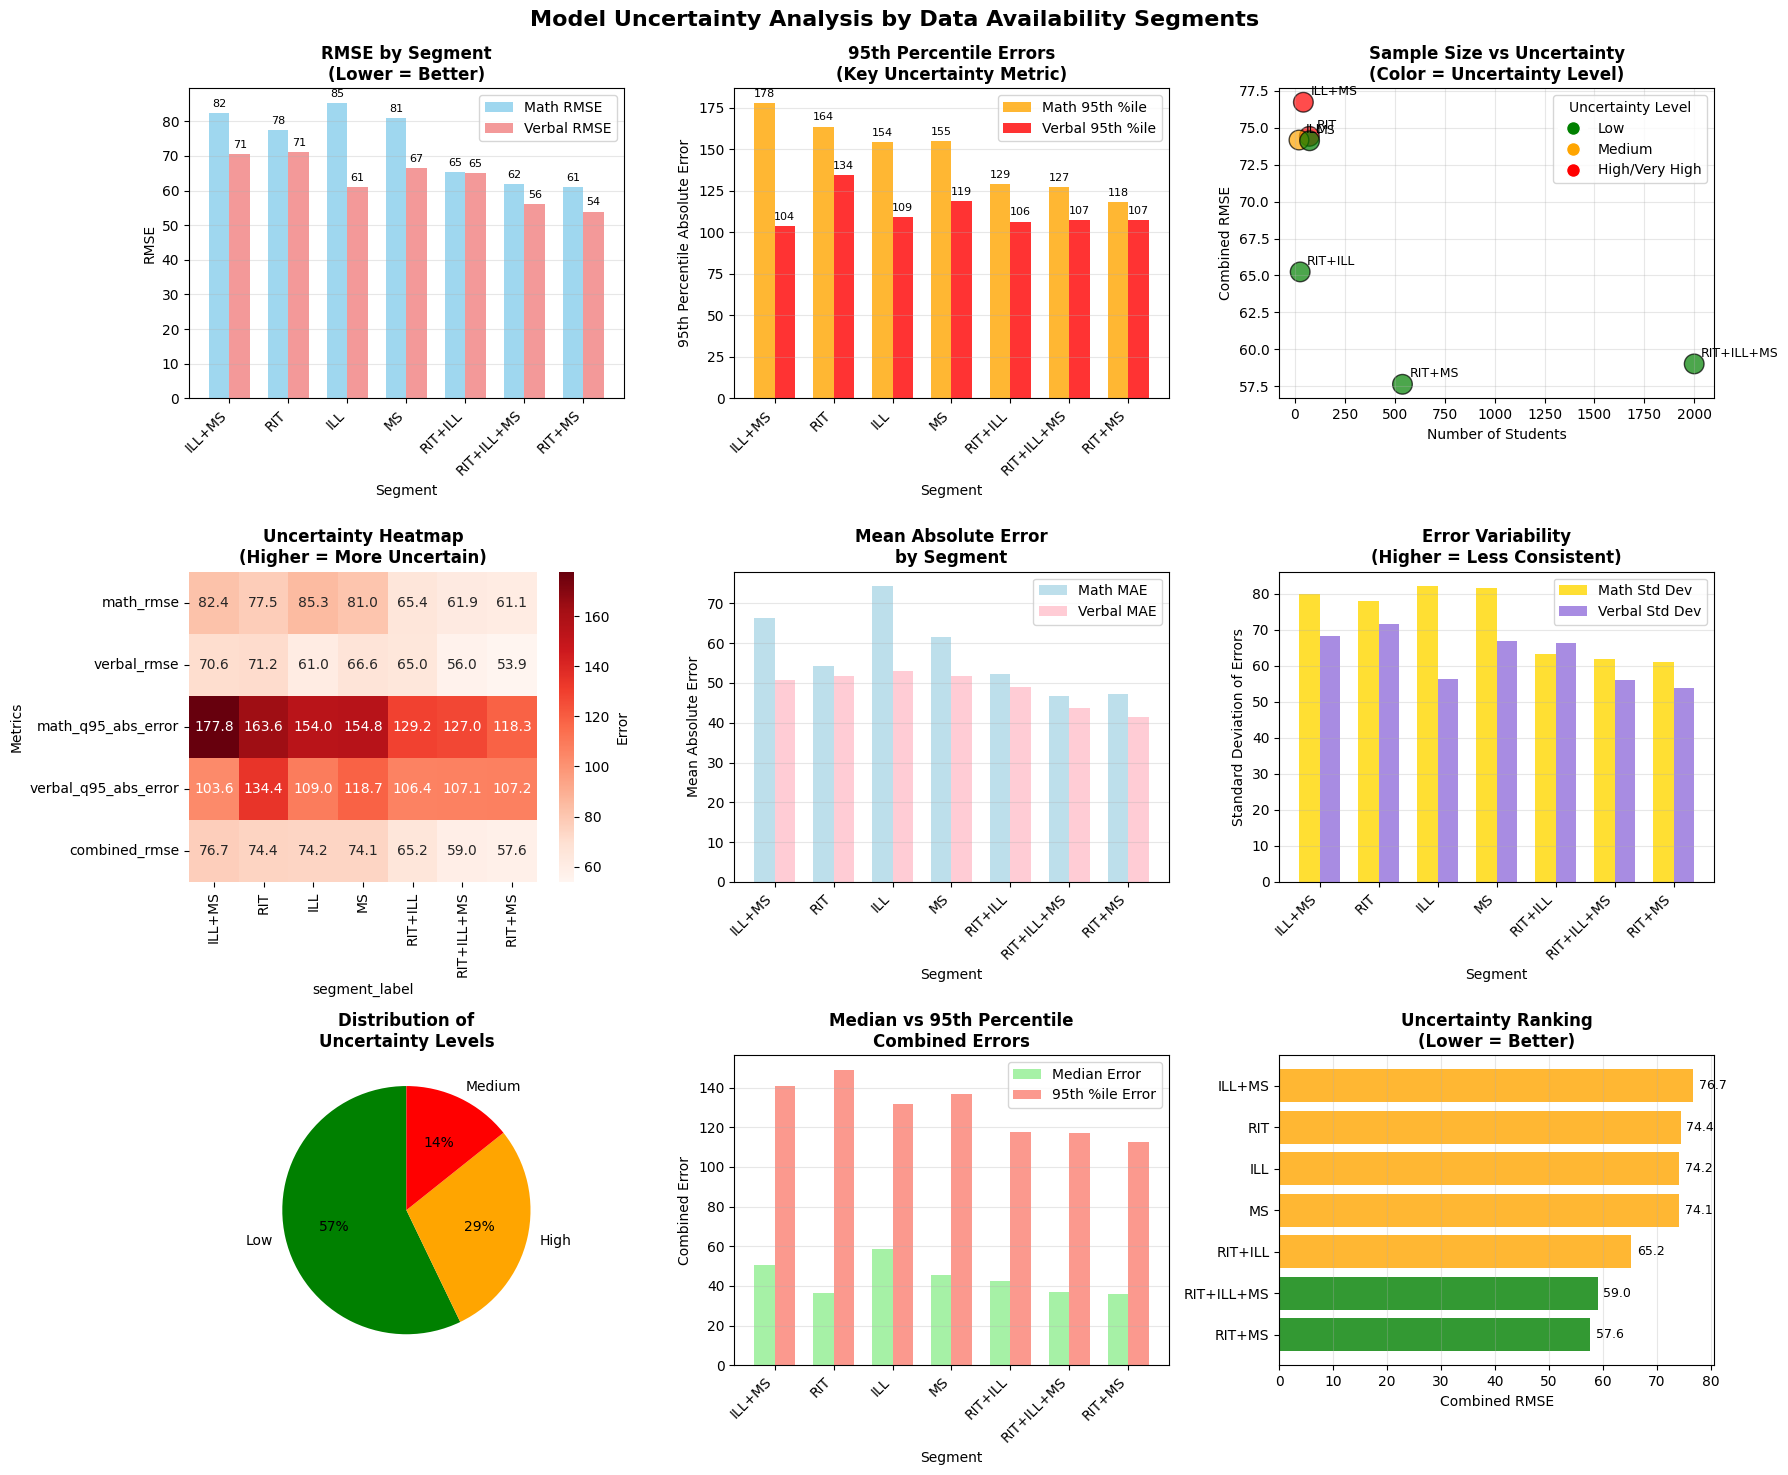

In [ ]:
# Set up the plotting style
plt.style.use("default")
sns.set_palette("husl")

# Create comprehensive uncertainty dashboard
fig, axes = plt.subplots(3, 3, figsize=(18, 15))
fig.suptitle(
    "Model Uncertainty Analysis by Data Availability Segments",
    fontsize=16,
    fontweight="bold",
)

# 1. RMSE Comparison (Top Left)
ax1 = axes[0, 0]
x_pos = np.arange(len(uncertainty_analysis_df))
width = 0.35

bars1 = ax1.bar(
    x_pos - width / 2,
    uncertainty_analysis_df["math_rmse"],
    width,
    label="Math RMSE",
    alpha=0.8,
    color="skyblue",
)
bars2 = ax1.bar(
    x_pos + width / 2,
    uncertainty_analysis_df["verbal_rmse"],
    width,
    label="Verbal RMSE",
    alpha=0.8,
    color="lightcoral",
)

ax1.set_xlabel("Segment")
ax1.set_ylabel("RMSE")
ax1.set_title("RMSE by Segment\n(Lower = Better)", fontweight="bold")
ax1.set_xticks(x_pos)
ax1.set_xticklabels(uncertainty_analysis_df["segment_label"], rotation=45, ha="right")
ax1.legend()
ax1.grid(axis="y", alpha=0.3)

# Add value labels on bars
for bar in bars1:
    height = bar.get_height()
    ax1.annotate(
        f"{height:.0f}",
        xy=(bar.get_x() + bar.get_width() / 2, height),
        xytext=(0, 3),
        textcoords="offset points",
        ha="center",
        va="bottom",
        fontsize=8,
    )
for bar in bars2:
    height = bar.get_height()
    ax1.annotate(
        f"{height:.0f}",
        xy=(bar.get_x() + bar.get_width() / 2, height),
        xytext=(0, 3),
        textcoords="offset points",
        ha="center",
        va="bottom",
        fontsize=8,
    )

# 2. 95th Percentile Errors (Top Middle) - KEY UNCERTAINTY METRIC
ax2 = axes[0, 1]
bars1 = ax2.bar(
    x_pos - width / 2,
    uncertainty_analysis_df["math_q95_abs_error"],
    width,
    label="Math 95th %ile",
    alpha=0.8,
    color="orange",
)
bars2 = ax2.bar(
    x_pos + width / 2,
    uncertainty_analysis_df["verbal_q95_abs_error"],
    width,
    label="Verbal 95th %ile",
    alpha=0.8,
    color="red",
)

ax2.set_xlabel("Segment")
ax2.set_ylabel("95th Percentile Absolute Error")
ax2.set_title("95th Percentile Errors\n(Key Uncertainty Metric)", fontweight="bold")
ax2.set_xticks(x_pos)
ax2.set_xticklabels(uncertainty_analysis_df["segment_label"], rotation=45, ha="right")
ax2.legend()
ax2.grid(axis="y", alpha=0.3)

# Add value labels
for bar in bars1:
    height = bar.get_height()
    ax2.annotate(
        f"{height:.0f}",
        xy=(bar.get_x() + bar.get_width() / 2, height),
        xytext=(0, 3),
        textcoords="offset points",
        ha="center",
        va="bottom",
        fontsize=8,
    )
for bar in bars2:
    height = bar.get_height()
    ax2.annotate(
        f"{height:.0f}",
        xy=(bar.get_x() + bar.get_width() / 2, height),
        xytext=(0, 3),
        textcoords="offset points",
        ha="center",
        va="bottom",
        fontsize=8,
    )

# 3. Sample Size vs Combined RMSE (Top Right)
ax3 = axes[0, 2]
colors = [
    (
        "red"
        if level in ["High", "Very High"]
        else "orange"
        if level == "Medium"
        else "green"
    )
    for level in uncertainty_analysis_df["uncertainty_level"]
]

scatter = ax3.scatter(
    uncertainty_analysis_df["n_students"],
    uncertainty_analysis_df["combined_rmse"],
    s=200,
    alpha=0.7,
    c=colors,
    edgecolors="black",
    linewidth=1,
)

ax3.set_xlabel("Number of Students")
ax3.set_ylabel("Combined RMSE")
ax3.set_title(
    "Sample Size vs Uncertainty\n(Color = Uncertainty Level)", fontweight="bold"
)
ax3.grid(True, alpha=0.3)

# Add segment labels
for _, row in uncertainty_analysis_df.iterrows():
    ax3.annotate(
        row["segment_label"],
        (row["n_students"], row["combined_rmse"]),
        xytext=(5, 5),
        textcoords="offset points",
        fontsize=9,
    )

# Add legend for colors
legend_elements = [
    plt.Line2D(
        [0],
        [0],
        marker="o",
        color="w",
        markerfacecolor="green",
        markersize=10,
        label="Low",
    ),
    plt.Line2D(
        [0],
        [0],
        marker="o",
        color="w",
        markerfacecolor="orange",
        markersize=10,
        label="Medium",
    ),
    plt.Line2D(
        [0],
        [0],
        marker="o",
        color="w",
        markerfacecolor="red",
        markersize=10,
        label="High/Very High",
    ),
]
ax3.legend(handles=legend_elements, title="Uncertainty Level")

# 4. Uncertainty Heatmap (Middle Left)
ax4 = axes[1, 0]
heatmap_data = uncertainty_analysis_df[
    [
        "math_rmse",
        "verbal_rmse",
        "math_q95_abs_error",
        "verbal_q95_abs_error",
        "combined_rmse",
    ]
].T
heatmap_data.columns = uncertainty_analysis_df["segment_label"]

sns.heatmap(
    heatmap_data,
    annot=True,
    fmt=".1f",
    cmap="Reds",
    ax=ax4,
    cbar_kws={"label": "Error"},
)
ax4.set_title("Uncertainty Heatmap\n(Higher = More Uncertain)", fontweight="bold")
ax4.set_ylabel("Metrics")

# 5. Mean Absolute Error Comparison (Middle Center)
ax5 = axes[1, 1]
bars1 = ax5.bar(
    x_pos - width / 2,
    uncertainty_analysis_df["math_mae"],
    width,
    label="Math MAE",
    alpha=0.8,
    color="lightblue",
)
bars2 = ax5.bar(
    x_pos + width / 2,
    uncertainty_analysis_df["verbal_mae"],
    width,
    label="Verbal MAE",
    alpha=0.8,
    color="pink",
)

ax5.set_xlabel("Segment")
ax5.set_ylabel("Mean Absolute Error")
ax5.set_title("Mean Absolute Error\nby Segment", fontweight="bold")
ax5.set_xticks(x_pos)
ax5.set_xticklabels(uncertainty_analysis_df["segment_label"], rotation=45, ha="right")
ax5.legend()
ax5.grid(axis="y", alpha=0.3)

# 6. Standard Deviation of Errors (Middle Right)
ax6 = axes[1, 2]
bars1 = ax6.bar(
    x_pos - width / 2,
    uncertainty_analysis_df["math_std_error"],
    width,
    label="Math Std Dev",
    alpha=0.8,
    color="gold",
)
bars2 = ax6.bar(
    x_pos + width / 2,
    uncertainty_analysis_df["verbal_std_error"],
    width,
    label="Verbal Std Dev",
    alpha=0.8,
    color="mediumpurple",
)

ax6.set_xlabel("Segment")
ax6.set_ylabel("Standard Deviation of Errors")
ax6.set_title("Error Variability\n(Higher = Less Consistent)", fontweight="bold")
ax6.set_xticks(x_pos)
ax6.set_xticklabels(uncertainty_analysis_df["segment_label"], rotation=45, ha="right")
ax6.legend()
ax6.grid(axis="y", alpha=0.3)

# 7. Uncertainty Level Distribution (Bottom Left)
ax7 = axes[2, 0]
uncertainty_counts = uncertainty_analysis_df["uncertainty_level"].value_counts()
colors_pie = ["green", "orange", "red", "darkred"]
ax7.pie(
    uncertainty_counts.values,
    labels=uncertainty_counts.index,
    autopct="%1.0f%%",
    colors=colors_pie[: len(uncertainty_counts)],
    startangle=90,
)
ax7.set_title("Distribution of\nUncertainty Levels", fontweight="bold")

# 8. Median vs 95th Percentile Errors (Bottom Center)
ax8 = axes[2, 1]
combined_median = (
    uncertainty_analysis_df["math_median_abs_error"]
    + uncertainty_analysis_df["verbal_median_abs_error"]
) / 2
combined_q95 = (
    uncertainty_analysis_df["math_q95_abs_error"]
    + uncertainty_analysis_df["verbal_q95_abs_error"]
) / 2

bars1 = ax8.bar(
    x_pos - width / 2,
    combined_median,
    width,
    label="Median Error",
    alpha=0.8,
    color="lightgreen",
)
bars2 = ax8.bar(
    x_pos + width / 2,
    combined_q95,
    width,
    label="95th %ile Error",
    alpha=0.8,
    color="salmon",
)

ax8.set_xlabel("Segment")
ax8.set_ylabel("Combined Error")
ax8.set_title("Median vs 95th Percentile\nCombined Errors", fontweight="bold")
ax8.set_xticks(x_pos)
ax8.set_xticklabels(uncertainty_analysis_df["segment_label"], rotation=45, ha="right")
ax8.legend()
ax8.grid(axis="y", alpha=0.3)

# 9. Uncertainty Ranking (Bottom Right)
ax9 = axes[2, 2]
sorted_df = uncertainty_analysis_df.sort_values("combined_rmse", ascending=True)
colors_bar = [
    "green" if x < 60 else "orange" if x < 80 else "red"
    for x in sorted_df["combined_rmse"]
]

bars = ax9.barh(
    range(len(sorted_df)), sorted_df["combined_rmse"], color=colors_bar, alpha=0.8
)
ax9.set_yticks(range(len(sorted_df)))
ax9.set_yticklabels(sorted_df["segment_label"])
ax9.set_xlabel("Combined RMSE")
ax9.set_title("Uncertainty Ranking\n(Lower = Better)", fontweight="bold")
ax9.grid(axis="x", alpha=0.3)

# Add value labels on bars
for _, (bar, value) in enumerate(zip(bars, sorted_df["combined_rmse"])):
    ax9.text(
        value + 1,
        bar.get_y() + bar.get_height() / 2,
        f"{value:.1f}",
        va="center",
        fontsize=9,
    )

plt.tight_layout(rect=[0, 0, 1, 0.99])
plt.show()

/var/folders/k2/dkmd0gld5bzg6w7mylrhgppr0000gn/T/ipykernel_94527/3760544907.py:348: UserWarning: Glyph 10003 (\N{CHECK MARK}) missing from font(s) Arial.
  plt.tight_layout(rect=[0, 0.02, 1, 0.94])
/var/folders/k2/dkmd0gld5bzg6w7mylrhgppr0000gn/T/ipykernel_94527/3760544907.py:348: UserWarning: Glyph 10007 (\N{BALLOT X}) missing from font(s) Arial.
  plt.tight_layout(rect=[0, 0.02, 1, 0.94])
/Users/sherman/GitHub/CSE-6748/ai-coach/lib/python3.10/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 10003 (\N{CHECK MARK}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/sherman/GitHub/CSE-6748/ai-coach/lib/python3.10/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 10007 (\N{BALLOT X}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)


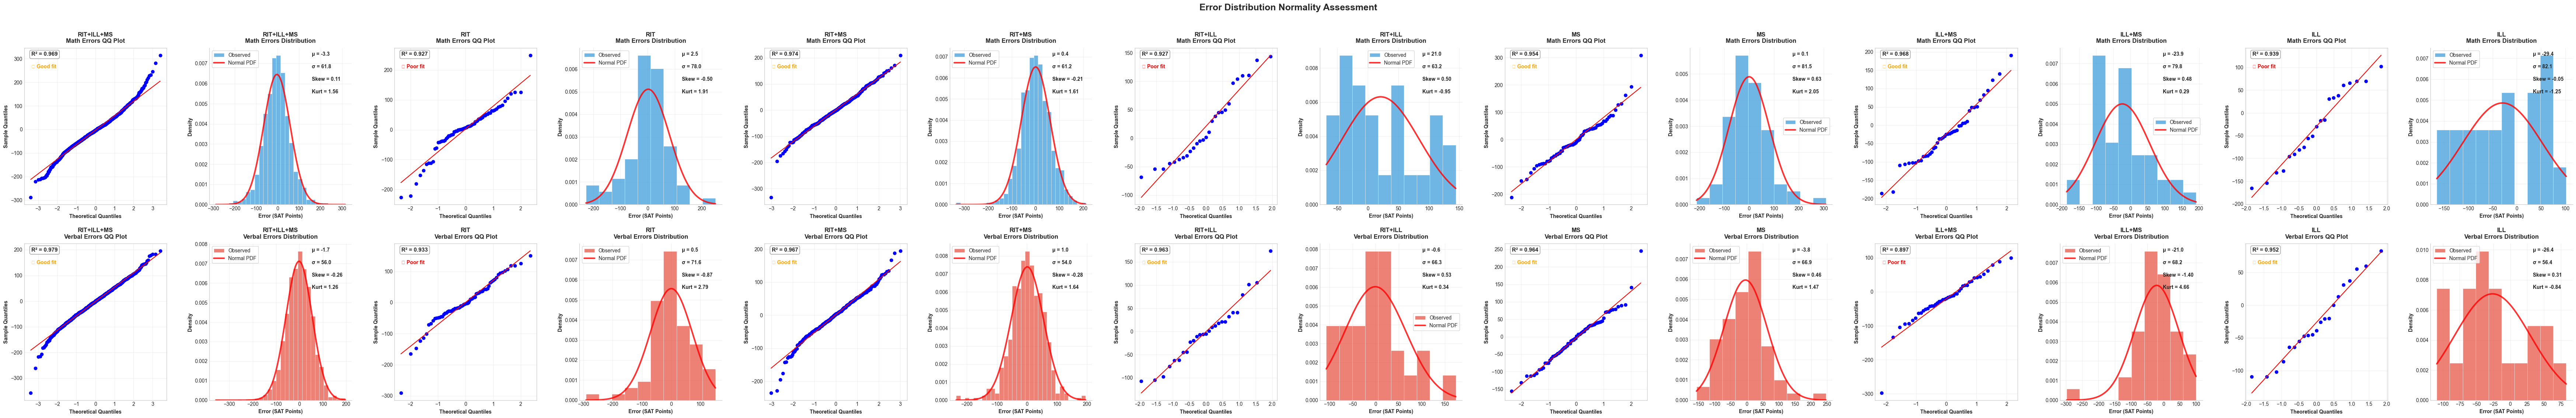


📊 INTERPRETATION GUIDE:
QQ PLOTS (Left columns):
• R² ≥ 0.98: ✅ Excellent normal fit - Use std dev methods confidently
• R² ≥ 0.95: ✓ Good normal fit - Use std dev methods
• R² < 0.95: ✗ Poor normal fit - Use percentile methods
• Points should follow diagonal line for normal distribution

HISTOGRAMS (Right columns):
• Red line = theoretical normal distribution
• Blue/Red bars = actual error distribution
• Good fit: bars closely follow red curve
• Skew ≈ 0, Kurtosis ≈ 0 for normal distribution

LAYOUT:
• Row 1: Math errors for all segments
• Row 2: Verbal errors for all segments
• Each segment: QQ plot (left) + PDF plot (right)


In [14]:
def create_simple_normality_plots(analysis_df):
    """
    Create clean QQ plots and normal PDF overlays for normality assessment
    Layout: Each segment has QQ plot (left) and PDF plot (right) side by side
    """

    # Add segment labels
    analysis_df_with_segments = analysis_df.copy()

    def create_segment_label(row):
        assessments = []
        if row["has_rit"]:
            assessments.append("RIT")
        if row["has_illuminate"]:
            assessments.append("ILL")
        if row["has_milestone"]:
            assessments.append("MS")
        return "+".join(assessments) if assessments else "None"

    analysis_df_with_segments["segment"] = analysis_df_with_segments.apply(
        create_segment_label, axis=1
    )

    # Get unique segments
    segments = analysis_df_with_segments["segment"].unique()
    n_segments = len(segments)

    # Set up plotting style
    plt.style.use("seaborn-v0_8-whitegrid")

    # Create the plot grid: 2 rows x (2 * n_segments) columns
    # Each segment gets 2 columns: QQ plot (left) and PDF plot (right)
    # Row 1: Math errors
    # Row 2: Verbal errors
    fig, axes = plt.subplots(2, 2 * n_segments, figsize=(10 * n_segments, 12))
    fig.suptitle(
        "Error Distribution Normality Assessment",
        fontsize=18,
        fontweight="bold",
        y=0.96,
    )

    # Ensure axes is 2D even with single segment
    if n_segments == 1:
        axes = axes.reshape(2, -1)

    # 1. MATH ERRORS (Row 1)
    for i, segment in enumerate(segments):
        segment_data = analysis_df_with_segments[
            analysis_df_with_segments["segment"] == segment
        ]

        if len(segment_data) > 3:
            errors = segment_data["error_math"]

            # QQ Plot (left column for this segment)
            ax_qq = axes[0, i * 2]
            stats.probplot(errors, dist="norm", plot=ax_qq)

            # Calculate R-squared for goodness of fit
            sorted_errors = np.sort(errors)
            theoretical_quantiles = stats.norm.ppf(
                np.linspace(0.01, 0.99, len(segment_data))
            )
            corr_coef = stats.pearsonr(sorted_errors, theoretical_quantiles)[0]
            r_squared = corr_coef**2

            ax_qq.set_title(
                f"{segment}\nMath Errors QQ Plot",
                fontsize=12,
                fontweight="bold",
                pad=10,
            )
            ax_qq.set_xlabel("Theoretical Quantiles", fontweight="bold")
            ax_qq.set_ylabel("Sample Quantiles", fontweight="bold")
            ax_qq.grid(True, alpha=0.3)

            # Add R-squared annotation
            ax_qq.text(
                0.05,
                0.95,
                f"R² = {r_squared:.3f}",
                transform=ax_qq.transAxes,
                fontsize=11,
                fontweight="bold",
                bbox={
                    "boxstyle": "round,pad=0.3",
                    "facecolor": "white",
                    "alpha": 0.8,
                    "edgecolor": "gray",
                },
            )

            # Color code the R-squared
            if r_squared >= 0.98:
                ax_qq.text(
                    0.05,
                    0.87,
                    "✅ Excellent fit",
                    transform=ax_qq.transAxes,
                    fontsize=10,
                    color="green",
                    fontweight="bold",
                )
            elif r_squared >= 0.95:
                ax_qq.text(
                    0.05,
                    0.87,
                    "✓ Good fit",
                    transform=ax_qq.transAxes,
                    fontsize=10,
                    color="orange",
                    fontweight="bold",
                )
            else:
                ax_qq.text(
                    0.05,
                    0.87,
                    "✗ Poor fit",
                    transform=ax_qq.transAxes,
                    fontsize=10,
                    color="red",
                    fontweight="bold",
                )

            # PDF Plot (right column for this segment)
            ax_pdf = axes[0, i * 2 + 1]

            # Create histogram
            n_bins = min(30, max(10, len(errors) // 10))
            ax_pdf.hist(
                errors,
                bins=n_bins,
                density=True,
                alpha=0.7,
                color="#3498db",
                edgecolor="white",
                linewidth=0.5,
                label="Observed",
            )

            # Overlay theoretical normal distribution
            mu, sigma = errors.mean(), errors.std()
            x = np.linspace(errors.min(), errors.max(), 100)
            normal_pdf = stats.norm.pdf(x, mu, sigma)
            ax_pdf.plot(x, normal_pdf, "r-", linewidth=3, label="Normal PDF", alpha=0.8)

            ax_pdf.set_title(
                f"{segment}\nMath Errors Distribution",
                fontsize=12,
                fontweight="bold",
                pad=10,
            )
            ax_pdf.set_xlabel("Error (SAT Points)", fontweight="bold")
            ax_pdf.set_ylabel("Density", fontweight="bold")
            ax_pdf.legend(frameon=True, fancybox=True, shadow=False)
            ax_pdf.grid(True, alpha=0.3)
            ax_pdf.spines["top"].set_visible(False)
            ax_pdf.spines["right"].set_visible(False)

            # Add distribution statistics
            skewness = stats.skew(errors)
            kurtosis = stats.kurtosis(errors)
            ax_pdf.text(
                0.72,
                0.95,
                f"μ = {mu:.1f}",
                transform=ax_pdf.transAxes,
                fontsize=10,
                fontweight="bold",
            )
            ax_pdf.text(
                0.72,
                0.87,
                f"σ = {sigma:.1f}",
                transform=ax_pdf.transAxes,
                fontsize=10,
                fontweight="bold",
            )
            ax_pdf.text(
                0.72,
                0.79,
                f"Skew = {skewness:.2f}",
                transform=ax_pdf.transAxes,
                fontsize=10,
                fontweight="bold",
            )
            ax_pdf.text(
                0.72,
                0.71,
                f"Kurt = {kurtosis:.2f}",
                transform=ax_pdf.transAxes,
                fontsize=10,
                fontweight="bold",
            )

    # 2. VERBAL ERRORS (Row 2)
    for i, segment in enumerate(segments):
        segment_data = analysis_df_with_segments[
            analysis_df_with_segments["segment"] == segment
        ]

        if len(segment_data) > 3:
            errors = segment_data["error_verbal"]

            # QQ Plot (left column for this segment)
            ax_qq = axes[1, i * 2]
            stats.probplot(errors, dist="norm", plot=ax_qq)

            # Calculate R-squared
            sorted_errors = np.sort(errors)
            theoretical_quantiles = stats.norm.ppf(
                np.linspace(0.01, 0.99, len(segment_data))
            )
            corr_coef = stats.pearsonr(sorted_errors, theoretical_quantiles)[0]
            r_squared = corr_coef**2

            ax_qq.set_title(
                f"{segment}\nVerbal Errors QQ Plot",
                fontsize=12,
                fontweight="bold",
                pad=10,
            )
            ax_qq.set_xlabel("Theoretical Quantiles", fontweight="bold")
            ax_qq.set_ylabel("Sample Quantiles", fontweight="bold")
            ax_qq.grid(True, alpha=0.3)

            # Add R-squared annotation
            ax_qq.text(
                0.05,
                0.95,
                f"R² = {r_squared:.3f}",
                transform=ax_qq.transAxes,
                fontsize=11,
                fontweight="bold",
                bbox={
                    "boxstyle": "round,pad=0.3",
                    "facecolor": "white",
                    "alpha": 0.8,
                    "edgecolor": "gray",
                },
            )

            # Color code the R-squared
            if r_squared >= 0.98:
                ax_qq.text(
                    0.05,
                    0.87,
                    "✅ Excellent fit",
                    transform=ax_qq.transAxes,
                    fontsize=10,
                    color="green",
                    fontweight="bold",
                )
            elif r_squared >= 0.95:
                ax_qq.text(
                    0.05,
                    0.87,
                    "✓ Good fit",
                    transform=ax_qq.transAxes,
                    fontsize=10,
                    color="orange",
                    fontweight="bold",
                )
            else:
                ax_qq.text(
                    0.05,
                    0.87,
                    "✗ Poor fit",
                    transform=ax_qq.transAxes,
                    fontsize=10,
                    color="red",
                    fontweight="bold",
                )

            # PDF Plot (right column for this segment)
            ax_pdf = axes[1, i * 2 + 1]

            # Create histogram
            n_bins = min(30, max(10, len(errors) // 10))
            ax_pdf.hist(
                errors,
                bins=n_bins,
                density=True,
                alpha=0.7,
                color="#e74c3c",
                edgecolor="white",
                linewidth=0.5,
                label="Observed",
            )

            # Overlay theoretical normal distribution
            mu, sigma = errors.mean(), errors.std()
            x = np.linspace(errors.min(), errors.max(), 100)
            normal_pdf = stats.norm.pdf(x, mu, sigma)
            ax_pdf.plot(x, normal_pdf, "r-", linewidth=3, label="Normal PDF", alpha=0.8)

            ax_pdf.set_title(
                f"{segment}\nVerbal Errors Distribution",
                fontsize=12,
                fontweight="bold",
                pad=10,
            )
            ax_pdf.set_xlabel("Error (SAT Points)", fontweight="bold")
            ax_pdf.set_ylabel("Density", fontweight="bold")
            ax_pdf.legend(frameon=True, fancybox=True, shadow=False)
            ax_pdf.grid(True, alpha=0.3)
            ax_pdf.spines["top"].set_visible(False)
            ax_pdf.spines["right"].set_visible(False)

            # Add distribution statistics
            skewness = stats.skew(errors)
            kurtosis = stats.kurtosis(errors)
            ax_pdf.text(
                0.72,
                0.95,
                f"μ = {mu:.1f}",
                transform=ax_pdf.transAxes,
                fontsize=10,
                fontweight="bold",
            )
            ax_pdf.text(
                0.72,
                0.87,
                f"σ = {sigma:.1f}",
                transform=ax_pdf.transAxes,
                fontsize=10,
                fontweight="bold",
            )
            ax_pdf.text(
                0.72,
                0.79,
                f"Skew = {skewness:.2f}",
                transform=ax_pdf.transAxes,
                fontsize=10,
                fontweight="bold",
            )
            ax_pdf.text(
                0.72,
                0.71,
                f"Kurt = {kurtosis:.2f}",
                transform=ax_pdf.transAxes,
                fontsize=10,
                fontweight="bold",
            )

    # Adjust layout
    plt.tight_layout(rect=[0, 0.02, 1, 0.94])
    plt.subplots_adjust(hspace=0.25, wspace=0.3)

    plt.show()


# Create the simplified normality plots
create_simple_normality_plots(analysis_df)

print("\n📊 INTERPRETATION GUIDE:")
print("=" * 50)
print("QQ PLOTS (Left columns):")
print("• R² ≥ 0.98: ✅ Excellent normal fit - Use std dev methods confidently")
print("• R² ≥ 0.95: ✓ Good normal fit - Use std dev methods")
print("• R² < 0.95: ✗ Poor normal fit - Use percentile methods")
print("• Points should follow diagonal line for normal distribution")
print()
print("HISTOGRAMS (Right columns):")
print("• Red line = theoretical normal distribution")
print("• Blue/Red bars = actual error distribution")
print("• Good fit: bars closely follow red curve")
print("• Skew ≈ 0, Kurtosis ≈ 0 for normal distribution")
print()
print("LAYOUT:")
print("• Row 1: Math errors for all segments")
print("• Row 2: Verbal errors for all segments")
print("• Each segment: QQ plot (left) + PDF plot (right)")

In [ ]:
def create_threshold_dataframe_with_qq_r2_assessment(
    analysis_df,
    uncertainty_analysis_df,
):
    """
    Create a dataframe with threshold values using 1 std dev for good QQ plot fits (R² ≥ 0.95)
    and corresponding percentiles for poor fits, for common standard deviation thresholds.
    """

    # Add segment labels to analysis_df
    analysis_df_with_segments = analysis_df.copy()

    def create_segment_label(row):
        assessments = []
        if row["has_rit"]:
            assessments.append("RIT")
        if row["has_illuminate"]:
            assessments.append("ILL")
        if row["has_milestone"]:
            assessments.append("MS")
        return "+".join(assessments) if assessments else "None"

    analysis_df_with_segments["segment"] = analysis_df_with_segments.apply(
        create_segment_label,
        axis=1,
    )

    # Define common standard deviation thresholds
    std_thresholds = [0.5, 1.0, 1.5, 2.0, 2.5, 3.0]

    # Map std dev to percentiles (assuming normal distribution)
    # For +/- k standard deviations, the percentiles are:
    std_to_percentile = {
        0.5: {"lower": 30.85, "upper": 69.15},  # ±0.5σ
        1.0: {"lower": 15.87, "upper": 84.13},  # ±1σ
        1.5: {"lower": 6.68, "upper": 93.32},  # ±1.5σ
        2.0: {"lower": 2.28, "upper": 97.72},  # ±2σ
        2.5: {"lower": 0.62, "upper": 99.38},  # ±2.5σ
        3.0: {"lower": 0.13, "upper": 99.87},  # ±3σ
    }

    def calculate_qq_r_squared(errors):
        """Calculate R² from QQ plot for normality assessment"""
        if len(errors) < 8:  # Need minimum sample size
            return 0.0

        sorted_errors = np.sort(errors)
        theoretical_quantiles = stats.norm.ppf(np.linspace(0.01, 0.99, len(errors)))
        corr_coef = stats.pearsonr(sorted_errors, theoretical_quantiles)[0]
        r_squared = corr_coef**2
        return r_squared

    threshold_results = []

    # Get unique segments
    segments = analysis_df_with_segments["segment"].unique()

    for segment in segments:
        segment_data = analysis_df_with_segments[
            analysis_df_with_segments["segment"] == segment
        ]

        if len(segment_data) < 5:  # Skip segments with too few samples
            continue

        # Get error data
        math_errors = segment_data["error_math"]
        verbal_errors = segment_data["error_verbal"]

        # Calculate QQ plot R² for both math and verbal errors
        math_r2 = calculate_qq_r_squared(math_errors)
        verbal_r2 = calculate_qq_r_squared(verbal_errors)

        # Get uncertainty metrics
        uncertainty_row = uncertainty_analysis_df[
            uncertainty_analysis_df["segment_label"] == segment
        ]

        if len(uncertainty_row) == 0:
            continue

        uncertainty_row = uncertainty_row.iloc[0]

        # Determine if std dev or percentiles be used based on R²
        # Use more conservative thresholds: R² ≥ 0.95 for std_dev
        math_use_std = math_r2 >= 0.95
        verbal_use_std = verbal_r2 >= 0.95

        # Determine method labels and recommendations
        if math_r2 >= 0.98:
            math_qq_assessment = "Excellent"
        elif math_r2 >= 0.95:
            math_qq_assessment = "Good"
        else:
            math_qq_assessment = "Poor"

        if verbal_r2 >= 0.98:
            verbal_qq_assessment = "Excellent"
        elif verbal_r2 >= 0.95:
            verbal_qq_assessment = "Good"
        else:
            verbal_qq_assessment = "Poor"

        # Calculate thresholds for each std deviation level
        for std_level in std_thresholds:
            # MATH THRESHOLDS
            if math_use_std:
                # Use standard deviation method
                math_mean = math_errors.mean()
                math_std = math_errors.std()
                math_lower_threshold = math_mean - (std_level * math_std)
                math_upper_threshold = math_mean + (std_level * math_std)
                math_method = "std_dev"
            else:
                # Use percentile method
                lower_pct = std_to_percentile[std_level]["lower"]
                upper_pct = std_to_percentile[std_level]["upper"]
                math_lower_threshold = np.percentile(math_errors, lower_pct)
                math_upper_threshold = np.percentile(math_errors, upper_pct)
                math_method = "percentile"

            # VERBAL THRESHOLDS
            if verbal_use_std:
                # Use standard deviation method
                verbal_mean = verbal_errors.mean()
                verbal_std = verbal_errors.std()
                verbal_lower_threshold = verbal_mean - (std_level * verbal_std)
                verbal_upper_threshold = verbal_mean + (std_level * verbal_std)
                verbal_method = "std_dev"
            else:
                # Use percentile method
                lower_pct = std_to_percentile[std_level]["lower"]
                upper_pct = std_to_percentile[std_level]["upper"]
                verbal_lower_threshold = np.percentile(verbal_errors, lower_pct)
                verbal_upper_threshold = np.percentile(verbal_errors, upper_pct)
                verbal_method = "percentile"

            # Calculate what percentage of errors fall within these thresholds
            math_within_threshold = (
                (math_errors >= math_lower_threshold)
                & (math_errors <= math_upper_threshold)
            ).mean() * 100

            verbal_within_threshold = (
                (verbal_errors >= verbal_lower_threshold)
                & (verbal_errors <= verbal_upper_threshold)
            ).mean() * 100

            threshold_results.append(
                {
                    "segment": segment,
                    "std_level": std_level,
                    "n_students": len(segment_data),
                    # Math thresholds
                    "math_method": math_method,
                    "math_lower_threshold": math_lower_threshold,
                    "math_upper_threshold": math_upper_threshold,
                    "math_threshold_range": math_upper_threshold - math_lower_threshold,
                    "math_pct_within_threshold": math_within_threshold,
                    "math_mean_error": math_errors.mean(),
                    "math_std_error": math_errors.std(),
                    "math_qq_r2": math_r2,
                    "math_qq_assessment": math_qq_assessment,
                    # Verbal thresholds
                    "verbal_method": verbal_method,
                    "verbal_lower_threshold": verbal_lower_threshold,
                    "verbal_upper_threshold": verbal_upper_threshold,
                    "verbal_threshold_range": verbal_upper_threshold
                    - verbal_lower_threshold,
                    "verbal_pct_within_threshold": verbal_within_threshold,
                    "verbal_mean_error": verbal_errors.mean(),
                    "verbal_std_error": verbal_errors.std(),
                    "verbal_qq_r2": verbal_r2,
                    "verbal_qq_assessment": verbal_qq_assessment,
                    # Combined metrics from uncertainty analysis
                    "combined_rmse": uncertainty_row["combined_rmse"],
                    "uncertainty_level": uncertainty_row["uncertainty_level"],
                }
            )

    threshold_df = pd.DataFrame(threshold_results)

    # Round numerical columns for better display
    numerical_cols = [
        "math_lower_threshold",
        "math_upper_threshold",
        "math_threshold_range",
        "math_pct_within_threshold",
        "math_mean_error",
        "math_std_error",
        "math_qq_r2",
        "verbal_lower_threshold",
        "verbal_upper_threshold",
        "verbal_threshold_range",
        "verbal_pct_within_threshold",
        "verbal_mean_error",
        "verbal_std_error",
        "verbal_qq_r2",
        "combined_rmse",
    ]

    for col in numerical_cols:
        if col in threshold_df.columns:
            threshold_df[col] = threshold_df[col].round(4)

    # Save the threshold dataframe as parquet
    threshold_df.to_parquet("data/cleaned/threshold_df.parquet", index=False)

    return threshold_df


# Create the threshold dataframe using QQ plot R²
threshold_df = create_threshold_dataframe_with_qq_r2_assessment(
    analysis_df,
    uncertainty_analysis_df,
)

print("🎯 ADAPTIVE THRESHOLD DATAFRAME (QQ Plot R² Based)")
print("=" * 80)
print(
    "Uses std dev for R² ≥ 0.95 (good normal fit), percentiles for R² < 0.95 (poor fit)"
)
print()

# Show detailed view for each threshold level
for std_level in [0.5, 1.0, 1.5, 2.0, 2.5, 3.0]:
    print(f"\n🔍 DETAILED VIEW: {std_level}σ THRESHOLDS")
    print("=" * 80)

    level_data = threshold_df[threshold_df["std_level"] == std_level].copy()
    level_data = level_data.sort_values("combined_rmse", ascending=False)

    display(level_data)

print("\n📝 INTERPRETATION GUIDE:")
print("=" * 50)
print("METHOD SELECTION (QQ Plot R² Based):")
print("• 'std_dev': Uses mean ± k×σ (for R² ≥ 0.95 = good normal fit)")
print("• 'percentile': Uses equivalent percentiles (for R² < 0.95 = poor fit)")
print()
print("QQ PLOT ASSESSMENT:")
print("• R² ≥ 0.98: Excellent normal fit")
print("• R² ≥ 0.95: Good normal fit")
print("• R² < 0.95: Poor normal fit")
print()
print("THRESHOLD RANGES:")
print("• Smaller range = more precise predictions")
print("• Larger range = more uncertainty but captures more students")
print()
print("PERCENTAGE WITHIN THRESHOLD:")
print("• Should be close to expected theoretical percentages:")
print("  - 0.5σ: ~38% of students")
print("  - 1σ: ~68% of students")
print("  - 1.5σ: ~87% of students")
print("  - 2σ: ~95% of students")
print("  - 2.5σ: ~99% of students")
print("  - 3σ: ~99.7% of students")
print()
print("UNCERTAINTY LEVELS:")
print("• Low: High confidence segments")
print("• Medium: Moderate confidence segments")
print("• High: Lower confidence segments")
print()
print("THRESHOLD INTERPRETATION:")
print("• math_lower_threshold: Lower bound (underpredictions beyond k×σ)")
print("• math_upper_threshold: Upper bound (overpredictions beyond k×σ)")
print("• Range shows prediction uncertainty width at k×σ level")

🎯 ADAPTIVE THRESHOLD DATAFRAME (QQ Plot R² Based)
Uses std dev for R² ≥ 0.95 (good normal fit), percentiles for R² < 0.95 (poor fit)


🔍 DETAILED VIEW: 0.5σ THRESHOLDS


,segment,std_level,n_students,math_method,math_lower_threshold,math_upper_threshold,math_threshold_range,math_pct_within_threshold,math_mean_error,math_std_error,math_qq_r2,math_qq_assessment,verbal_method,verbal_lower_threshold,verbal_upper_threshold,verbal_threshold_range,verbal_pct_within_threshold,verbal_mean_error,verbal_std_error,verbal_qq_r2,verbal_qq_assessment,combined_rmse,uncertainty_level
30,ILL+MS,0.5,43,std_dev,-63.7691,16.0481,79.8172,44.1860,-23.8605,79.8172,0.9684,Good,percentile,-41.0430,10.3010,51.3440,39.5349,-21.0000,68.1954,0.8965,Poor,76.73,High
6,RIT,0.5,73,percentile,-16.5760,36.5760,53.1520,36.9863,2.5068,78.0397,0.9266,Poor,percentile,-25.3640,31.7880,57.1520,36.9863,0.4658,71.6425,0.9330,Poor,74.42,High
36,ILL,0.5,21,percentile,-79.9800,32.6600,112.6400,33.3333,-29.4286,82.0528,0.9387,Poor,std_dev,-54.5689,1.8070,56.3759,38.0952,-26.3810,56.3759,0.9519,Good,74.17,Medium
24,MS,0.5,74,std_dev,-40.7071,40.8152,81.5223,41.8919,0.0541,81.5223,0.9543,Good,std_dev,-37.2129,29.6994,66.9123,37.8378,-3.7568,66.9123,0.9643,Good,74.12,Low
18,RIT+ILL,0.5,27,percentile,-22.8740,45.9790,68.8530,33.3333,20.9630,63.1753,0.9274,Poor,std_dev,-33.7282,32.5430,66.2712,48.1481,-0.5926,66.2712,0.9630,Good,65.24,Low
0,RIT+ILL+MS,0.5,1999,std_dev,-34.1716,27.6063,61.7780,44.0720,-3.2826,61.7780,0.9690,Good,std_dev,-29.6878,26.3271,56.0149,39.5198,-1.6803,56.0149,0.9790,Good,59.01,Low
12,RIT+MS,0.5,539,std_dev,-30.2262,30.9461,61.1723,41.3729,0.3599,61.1723,0.9736,Good,std_dev,-25.9330,28.0220,53.9550,40.4453,1.0445,53.9550,0.9670,Good,57.63,Low



🔍 DETAILED VIEW: 1.0σ THRESHOLDS


,segment,std_level,n_students,math_method,math_lower_threshold,math_upper_threshold,math_threshold_range,math_pct_within_threshold,math_mean_error,math_std_error,math_qq_r2,math_qq_assessment,verbal_method,verbal_lower_threshold,verbal_upper_threshold,verbal_threshold_range,verbal_pct_within_threshold,verbal_mean_error,verbal_std_error,verbal_qq_r2,verbal_qq_assessment,combined_rmse,uncertainty_level
31,ILL+MS,1.0,43,std_dev,-103.6777,55.9568,159.6345,76.7442,-23.8605,79.8172,0.9684,Good,percentile,-67.6844,41.3346,109.0190,67.4419,-21.0000,68.1954,0.8965,Poor,76.73,High
7,RIT,1.0,73,percentile,-41.5736,64.0000,105.5736,68.4932,2.5068,78.0397,0.9266,Poor,percentile,-48.5736,69.2944,117.8680,67.1233,0.4658,71.6425,0.9330,Poor,74.42,High
37,ILL,1.0,21,percentile,-121.6060,65.1300,186.7360,61.9048,-29.4286,82.0528,0.9387,Poor,std_dev,-82.7569,29.9950,112.7519,57.1429,-26.3810,56.3759,0.9519,Good,74.17,Medium
25,MS,1.0,74,std_dev,-81.4683,81.5764,163.0446,74.3243,0.0541,81.5223,0.9543,Good,std_dev,-70.6691,63.1555,133.8246,68.9189,-3.7568,66.9123,0.9643,Good,74.12,Low
19,RIT+ILL,1.0,27,percentile,-41.3690,103.1166,144.4856,62.9630,20.9630,63.1753,0.9274,Poor,std_dev,-66.8637,65.6786,132.5423,70.3704,-0.5926,66.2712,0.9630,Good,65.24,Low
1,RIT+ILL+MS,1.0,1999,std_dev,-65.0606,58.4953,123.5559,72.9365,-3.2826,61.7780,0.9690,Good,std_dev,-57.6952,54.3345,112.0298,70.8354,-1.6803,56.0149,0.9790,Good,59.01,Low
13,RIT+MS,1.0,539,std_dev,-60.8124,61.5322,122.3446,72.3562,0.3599,61.1723,0.9736,Good,std_dev,-52.9104,54.9995,107.9099,72.1707,1.0445,53.9550,0.9670,Good,57.63,Low



🔍 DETAILED VIEW: 1.5σ THRESHOLDS


,segment,std_level,n_students,math_method,math_lower_threshold,math_upper_threshold,math_threshold_range,math_pct_within_threshold,math_mean_error,math_std_error,math_qq_r2,math_qq_assessment,verbal_method,verbal_lower_threshold,verbal_upper_threshold,verbal_threshold_range,verbal_pct_within_threshold,verbal_mean_error,verbal_std_error,verbal_qq_r2,verbal_qq_assessment,combined_rmse,uncertainty_level
32,ILL+MS,1.5,43,std_dev,-143.5863,95.8654,239.4517,88.3721,-23.8605,79.8172,0.9684,Good,percentile,-95.9440,65.3048,161.2488,86.0465,-21.0000,68.1954,0.8965,Poor,76.73,High
8,RIT,1.5,73,percentile,-118.9984,97.9040,216.9024,86.3014,2.5068,78.0397,0.9266,Poor,percentile,-103.4752,102.9520,206.4272,86.3014,0.4658,71.6425,0.9330,Poor,74.42,High
38,ILL,1.5,21,percentile,-146.2720,70.0000,216.2720,85.7143,-29.4286,82.0528,0.9387,Poor,std_dev,-110.9449,58.1830,169.1278,90.4762,-26.3810,56.3759,0.9519,Good,74.17,Medium
26,MS,1.5,74,std_dev,-122.2294,122.3375,244.5669,89.1892,0.0541,81.5223,0.9543,Good,std_dev,-104.1252,96.6117,200.7369,89.1892,-3.7568,66.9123,0.9643,Good,74.12,Low
20,RIT+ILL,1.5,27,percentile,-54.0000,117.8432,171.8432,88.8889,20.9630,63.1753,0.9274,Poor,std_dev,-99.9993,98.8141,198.8135,81.4815,-0.5926,66.2712,0.9630,Good,65.24,Low
2,RIT+ILL+MS,1.5,1999,std_dev,-95.9496,89.3843,185.3339,88.0940,-3.2826,61.7780,0.9690,Good,std_dev,-85.7027,82.3420,168.0446,87.5938,-1.6803,56.0149,0.9790,Good,59.01,Low
14,RIT+MS,1.5,539,std_dev,-91.3985,92.1184,183.5169,86.4564,0.3599,61.1723,0.9736,Good,std_dev,-79.8879,81.9770,161.8649,89.0538,1.0445,53.9550,0.9670,Good,57.63,Low



🔍 DETAILED VIEW: 2.0σ THRESHOLDS


,segment,std_level,n_students,math_method,math_lower_threshold,math_upper_threshold,math_threshold_range,math_pct_within_threshold,math_mean_error,math_std_error,math_qq_r2,math_qq_assessment,verbal_method,verbal_lower_threshold,verbal_upper_threshold,verbal_threshold_range,verbal_pct_within_threshold,verbal_mean_error,verbal_std_error,verbal_qq_r2,verbal_qq_assessment,combined_rmse,uncertainty_level
33,ILL+MS,2.0,43,std_dev,-183.4949,135.7740,319.2689,93.0233,-23.8605,79.8172,0.9684,Good,percentile,-140.9536,89.4664,230.4200,95.3488,-21.0000,68.1954,0.8965,Poor,76.73,High
9,RIT,2.0,73,percentile,-195.6944,126.0000,321.6944,95.8904,2.5068,78.0397,0.9266,Poor,percentile,-153.4512,121.5088,274.9600,94.5205,0.4658,71.6425,0.9330,Poor,74.42,High
39,ILL,2.0,21,percentile,-159.9840,87.4080,247.3920,90.4762,-29.4286,82.0528,0.9387,Poor,std_dev,-139.1329,86.3709,225.5038,100.0000,-26.3810,56.3759,0.9519,Good,74.17,Medium
27,MS,2.0,74,std_dev,-162.9906,163.0987,326.0893,95.9459,0.0541,81.5223,0.9543,Good,std_dev,-137.5813,130.0678,267.6492,95.9459,-3.7568,66.9123,0.9643,Good,74.12,Low
21,RIT+ILL,2.0,27,percentile,-59.7008,139.8504,199.5512,92.5926,20.9630,63.1753,0.9274,Poor,std_dev,-133.1349,131.9497,265.0846,96.2963,-0.5926,66.2712,0.9630,Good,65.24,Low
3,RIT+ILL+MS,2.0,1999,std_dev,-126.8386,120.2733,247.1118,94.5973,-3.2826,61.7780,0.9690,Good,std_dev,-113.7101,110.3494,224.0595,95.8479,-1.6803,56.0149,0.9790,Good,59.01,Low
15,RIT+MS,2.0,539,std_dev,-121.9846,122.7045,244.6891,95.1763,0.3599,61.1723,0.9736,Good,std_dev,-106.8654,108.9545,215.8199,94.8052,1.0445,53.9550,0.9670,Good,57.63,Low



🔍 DETAILED VIEW: 2.5σ THRESHOLDS


,segment,std_level,n_students,math_method,math_lower_threshold,math_upper_threshold,math_threshold_range,math_pct_within_threshold,math_mean_error,math_std_error,math_qq_r2,math_qq_assessment,verbal_method,verbal_lower_threshold,verbal_upper_threshold,verbal_threshold_range,verbal_pct_within_threshold,verbal_mean_error,verbal_std_error,verbal_qq_r2,verbal_qq_assessment,combined_rmse,uncertainty_level
34,ILL+MS,2.5,43,std_dev,-223.4035,175.6826,399.0861,97.6744,-23.8605,79.8172,0.9684,Good,percentile,-255.2944,97.1356,352.4300,95.3488,-21.0000,68.1954,0.8965,Poor,76.73,High
10,RIT,2.5,73,percentile,-224.7680,194.6464,419.4144,97.2603,2.5068,78.0397,0.9266,Poor,percentile,-234.7536,139.8400,374.5936,97.2603,0.4658,71.6425,0.9330,Poor,74.42,High
40,ILL,2.5,21,percentile,-163.6360,98.0320,261.6680,90.4762,-29.4286,82.0528,0.9387,Poor,std_dev,-167.3208,114.5589,281.8797,100.0000,-26.3810,56.3759,0.9519,Good,74.17,Medium
28,MS,2.5,74,std_dev,-203.7517,203.8598,407.6116,97.2973,0.0541,81.5223,0.9543,Good,std_dev,-171.0375,163.5240,334.5615,98.6486,-3.7568,66.9123,0.9643,Good,74.12,Low
22,RIT+ILL,2.5,27,percentile,-65.7432,142.8716,208.6148,92.5926,20.9630,63.1753,0.9274,Poor,std_dev,-166.2705,165.0853,331.3558,96.2963,-0.5926,66.2712,0.9630,Good,65.24,Low
4,RIT+ILL+MS,2.5,1999,std_dev,-157.7275,151.1623,308.8898,97.6488,-3.2826,61.7780,0.9690,Good,std_dev,-141.7175,138.3569,280.0744,98.2991,-1.6803,56.0149,0.9790,Good,59.01,Low
16,RIT+MS,2.5,539,std_dev,-152.5708,153.2906,305.8614,98.5158,0.3599,61.1723,0.9736,Good,std_dev,-133.8429,135.9320,269.7749,98.3302,1.0445,53.9550,0.9670,Good,57.63,Low



🔍 DETAILED VIEW: 3.0σ THRESHOLDS


,segment,std_level,n_students,math_method,math_lower_threshold,math_upper_threshold,math_threshold_range,math_pct_within_threshold,math_mean_error,math_std_error,math_qq_r2,math_qq_assessment,verbal_method,verbal_lower_threshold,verbal_upper_threshold,verbal_threshold_range,verbal_pct_within_threshold,verbal_mean_error,verbal_std_error,verbal_qq_r2,verbal_qq_assessment,combined_rmse,uncertainty_level
35,ILL+MS,3.0,43,std_dev,-263.3121,215.5912,478.9034,100.0000,-23.8605,79.8172,0.9684,Good,percentile,-289.0456,99.3994,388.4450,95.3488,-21.0000,68.1954,0.8965,Poor,76.73,High
11,RIT,3.0,73,percentile,-226.5320,238.3936,464.9256,97.2603,2.5068,78.0397,0.9266,Poor,percentile,-279.2064,148.6600,427.8664,97.2603,0.4658,71.6425,0.9330,Poor,74.42,High
41,ILL,3.0,21,percentile,-164.7140,101.1680,265.8820,90.4762,-29.4286,82.0528,0.9387,Poor,std_dev,-195.5088,142.7469,338.2557,100.0000,-26.3810,56.3759,0.9519,Good,74.17,Medium
29,MS,3.0,74,std_dev,-244.5129,244.6210,489.1339,98.6486,0.0541,81.5223,0.9543,Good,std_dev,-204.4936,196.9801,401.4738,98.6486,-3.7568,66.9123,0.9643,Good,74.12,Low
23,RIT+ILL,3.0,27,percentile,-67.5268,143.7634,211.2902,92.5926,20.9630,63.1753,0.9274,Poor,std_dev,-199.4061,198.2209,397.6269,100.0000,-0.5926,66.2712,0.9630,Good,65.24,Low
5,RIT+ILL+MS,3.0,1999,std_dev,-188.6165,182.0512,370.6678,98.8494,-3.2826,61.7780,0.9690,Good,std_dev,-169.7250,166.3643,336.0893,99.2496,-1.6803,56.0149,0.9790,Good,59.01,Low
17,RIT+MS,3.0,539,std_dev,-183.1569,183.8768,367.0337,99.4434,0.3599,61.1723,0.9736,Good,std_dev,-160.8204,162.9095,323.7298,98.7013,1.0445,53.9550,0.9670,Good,57.63,Low



📝 INTERPRETATION GUIDE:
METHOD SELECTION (QQ Plot R² Based):
• 'std_dev': Uses mean ± k×σ (for R² ≥ 0.95 = good normal fit)
• 'percentile': Uses equivalent percentiles (for R² < 0.95 = poor fit)

QQ PLOT ASSESSMENT:
• R² ≥ 0.98: Excellent normal fit
• R² ≥ 0.95: Good normal fit
• R² < 0.95: Poor normal fit

THRESHOLD RANGES:
• Smaller range = more precise predictions
• Larger range = more uncertainty but captures more students

PERCENTAGE WITHIN THRESHOLD:
• Should be close to expected theoretical percentages:
  - 0.5σ: ~38% of students
  - 1σ: ~68% of students
  - 1.5σ: ~87% of students
  - 2σ: ~95% of students
  - 2.5σ: ~99% of students
  - 3σ: ~99.7% of students

UNCERTAINTY LEVELS:
• Low: High confidence segments
• Medium: Moderate confidence segments
• High: Lower confidence segments

THRESHOLD INTERPRETATION:
• math_lower_threshold: Lower bound (underpredictions beyond k×σ)
• math_upper_threshold: Upper bound (overpredictions beyond k×σ)
• Range shows prediction uncertainty widt